# Let's get started

Pull the front page and get the links.
Some use BeautifulSoup to do this but regexp
is more efficient

ModuleNotFoundError: No module named 'bs4'

In [1]:
import datetime, calendar
mydate = datetime.datetime.now()
 
yy, mm, dd = str(mydate).split(' ')[0].split('-')
today = calendar.month_abbr[int(mm)].lower() + '/' + dd

In [2]:
import requests
import re
pp = re.compile('<a href="(.*?)".*?data-link-name="(.*?)"', re.DOTALL)
r = requests.get('https://www.theguardian.com/')


lks =  set([ lk for lk, name in pp.findall(r.text) 
                       if name == 'article' and today in ])  



SyntaxError: invalid syntax (<ipython-input-2-00f060f39b88>, line 8)

In [19]:
list(lks)[:]

NameError: name 'lks' is not defined

In [18]:
pp.findall(r.text)

NameError: name 'pp' is not defined

# Sorting the links

I always write a class to do this.
The object contains :

- meta data
- a payload
- a unique identifier generated using a hash fucntion


In [4]:
import hashlib

class GuardianArt():
    
    def __init__(self, lk=""):
        self.raw = lk
        self.id = str(hash(self))
        
        #this is the payload
        self.goose_art = None
        
        #the rest is meta data
        self.label = lk.split('/')[3]
        self.tag = 'misc'
        
        
        #change tag from misc if appropriate to do so 
        if ( lk.split('/')[4] in ['audio', 'video', 'gallery']):
            self.tag = self.label = 'xmedia'    
        elif (self.label == 'world' or 'news' in self.label):
            self.tag = 'news'
        elif self.label == 'commentisfree':
            self.tag = 'op_ed'

    def __hash__(self):
        return int( hashlib.md5(self.raw.encode()).hexdigest(), 16)
        
    def __repr__(self):
        return self.raw
    
    def __str__(self):
        return self.raw


arts = [GuardianArt(lk) for lk in lks]

shit_list = ['xmedia', 'football', 'business', 'stage', 'sport'] 
arts = [art for art in arts 
             if art.label not in shit_list]

#tags = set([art.tag for art in arts])
misc = set([art.label for art in arts if art.tag == 'misc'])

# Loading the articles

This used to be hard but I use Goose to do this now

In [5]:
from goose3 import Goose
#from  bs4 import BeautifulSoup

gg = Goose()

for art in arts:
    print(  str(art).split('/')[-1],)
    try:
        art.goose_art = gg.extract(url=str(art) ) 
    except:
        pass


japanese-food-store-closes-after-videos-of-rats-browsing-its-shelves-go-viral
stare-seagulls-out-to-save-your-snacks-researcher-says
fossil-fuel-lobby-pollute-politics-climate-crisis
no-deal-brexit-would-harm-uk-security-senior-officer-warns
i-am-really-shy-introducing-phoenix-the-worlds-first-hijab-wearing-champion-wrestler
high-speed-trains-to-nowhere-australias-long-running-rail-fail
post-referendum-britain-royals-progressive-meghan-markle
high-court-rules-public-servants-can-be-sacked-for-political-social-media-posts
fight-for-our-lives-fiji-calls-world-leaders-selfish-as-it-lays-out-climate-crisis-blueprint
hong-kong-protests-australia-issues-travel-alert-as-china-warns-of-worst-crisis-since-1997
salisbury-attack-metropolitan-police-examine-role-vladimir-putin-russia
kathy-burke-after-i-got-sick-the-toughest-thing-was-what-it-did-to-my-mental-health
bondi-beach-mural-of-border-force-officers-defaced-after-council-vote-to-keep-it
canada-manhunt-police-find-several-items-linked-to-s

# Output to HTML

There are libraries for doing HTML output from python 
but as often as not string formatting is easier.

In [7]:
header = '''<!DOCTYPE html>
<html id="js-context" class="js-off is-not-modern id--signed-out" lang="en" data-page-path="/international">
<head>
<title>News, sport and opinion from the Guardian's global edition | The Guardian</title>
<meta charset="utf-8">
</head>
'''  

headline_wrapper = '<h2 id="%s">%s</h2>'
keyword_wrapper = '<h4>%s</h4>'
para_wrapper = "<p>%s</p>\n\n"
toc_item_wrapper = '<a href="#%s">%s</a><br>\n'

sections = ['news', 'op_ed', 'misc']
text  = {x:[] for x in sections}
tocs  = {x:[] for x in sections}


for yy in arts:
    #the goose object is stored in the article
    art = yy.goose_art
    
    html_id = (yy.id, art.title)
    tocs[yy.tag].append(html_id) 
    
    html_text = ''.join( [para_wrapper%x for x in art.cleaned_text.split('\n'*2)])
    text[yy.tag].append('\n\n'.join([ headline_wrapper%html_id, 
                                      keyword_wrapper%art.meta_keywords, 
                                      html_text]))

#write to a file remember to use a context cos it's cleaner   
with  open('text.html','w') as fp:
    fp.write(header + '<body>\n')
    
    for ss in sections:
        fp.write('<h1>%s</h1>'%ss.upper())
        toc_html = [toc_item_wrapper%x for x in tocs[ss] ]
        fp.write(''.join(toc_html) + '<br>\n')
        
    for ss in sections:
        fp.write('\n'.join(text[ss]) )

    fp.write('</body>\n')

In [1]:
def counter(n=0):
    while 1:
        yield(str(n))
        n += 1

get_id = counter(n=0)
        
for x in range(5):
    print(next(get_id))
    
    

0
1
2
3
4


In [3]:
#print(' \n'.join([ x for x in dir(art) if x[0] != '_']) )
wrapper = "<p>%s</p>\n\n"
dd = [wrapper%x for x in art.cleaned_text.split('\n'*2)]
print(dd)


["<p>It's hard to convey what a dreadful experience this exhibition is. The best is bad, the worst beneath description. It is leaden, dull, pretentious, coarse, dishonest, desperate and futile. I cannot believe it is an accurate report on the state of German art, and if it is, what has gone wrong?</p>\n\n", '<p>German art was the most consistently interesting and surprising of the past century. France sparkled in the 1900s, America after 1940. Germany alone was as provocatively creative in the 1980s as it had been in 1918. Not only that, a recognisable tradition connects the Dadaism of Hannah Höch and George Grosz, or the expressionism of Franz Marc and Emil Nolde in the first half of the century with the later brilliance of Joseph Beuys, Anselm Kiefer or Martin Kippenberger.</p>\n\n', "<p>This is all the more surprising given how utterly German history was broken by Hitler. None of that survives in this wasteland of an exhibition. It claims to be identifying a new national spirit in G

In [13]:
print(article.cleaned_text)

If not exactly a local saint, like Churchill or Florence Nightingale, Charles Dickens comes close enough for his reputation to have largely survived, to date, the documented mistreatment of his wife, Catherine, mother of his 10 children. She was publicly dumped by him, denigrated and separated from all but one of their children, having become fat and – to Dickens – dull.

Indeed, as the playwright Martin McDonagh demonstrated in a recent play, A Very Very Very Dark Matter, the reputational damage has been so scant that his hilarious reimagining of the creator of Tiny Tim – as a foulmouthed, lecherous fraud – came across as not so much counterfactual as wildly blasphemous.

It was natural, then, that last week’s revelation by John Bowen, professor of 19th century literature at the University of York that Dickens may have taken gaslighting his wife to the point of attempted false imprisonment would be received with dismay, even reluctance. “But he’s still a good man?” pleaded one promine

In [2]:
#from goose3 import Goose
import bs4
from  bs4 import BeautifulSoup

import requests
import re, os

def get_series( key_word='profile/hadleyfreeman'):
    
    user_agent = {'User-agent': 'Mozilla/5.0'}
    #needs to be https otherwise might provoke a redirect
    base_url = 'https://www.theguardian.com/' + key_word
    stuff = []
    while True:  
        #params instead of data bitch
        params = {'page': len(stuff) + 1}
        #if stuff == []: 
        #    params = ""
        r = requests.get( base_url, 
                          allow_redirects=False,
                          headers=user_agent, 
                          params=params)
       
        #this should fail with 301 i.e. redirect
        if r.status_code != 200: 
            print('\nFailed: %s'%r.url, r.status_code)
            break
        print('page >', r.url)
        soup = BeautifulSoup(r.text)
        stuff.append(soup.find_all("a", {"class":"fc-item__link"}) )
     
    return stuff

name = 'profile/marinahyde'
subject ='world/black-lives-matter-movement'
subject = 'society/transgender'
subject = 'profile/julia-carrie-wong'
subject = 'profile/rhiannon-lucy-cosslett'
subject = 'profile/nesrinemalik'
subject = '/profile/simone-lia'
subject = 'profile/owen-jones'
subject = 'society/transgender'
subject = 'profile/afuahirsch'
subject = 'profile/rebeccasolnit'
subject ='profile/gabyhinsliff'
subject = '/profile/davidsmith'
subject ='/profile/simontisdall'
subject = 'profile/nickcohen'
tt = get_series(key_word=subject)

page > https://www.theguardian.com/profile/nickcohen?page=1
page > https://www.theguardian.com/profile/nickcohen?page=2
page > https://www.theguardian.com/profile/nickcohen?page=3
page > https://www.theguardian.com/profile/nickcohen?page=4
page > https://www.theguardian.com/profile/nickcohen?page=5
page > https://www.theguardian.com/profile/nickcohen?page=6
page > https://www.theguardian.com/profile/nickcohen?page=7
page > https://www.theguardian.com/profile/nickcohen?page=8
page > https://www.theguardian.com/profile/nickcohen?page=9
page > https://www.theguardian.com/profile/nickcohen?page=10
page > https://www.theguardian.com/profile/nickcohen?page=11
page > https://www.theguardian.com/profile/nickcohen?page=12
page > https://www.theguardian.com/profile/nickcohen?page=13
page > https://www.theguardian.com/profile/nickcohen?page=14
page > https://www.theguardian.com/profile/nickcohen?page=15
page > https://www.theguardian.com/profile/nickcohen?page=16
page > https://www.theguardian.co

# Install bs4 in the NLP environment

conda activate NLP then do a pip install


In [3]:
data = []
for page in tt:
    data.extend([(x.text.strip(), x['href'].split('/')[3], x['href']) for x in page])
ppp, tag, urls = zip(*data)

import csv

with open('%s.csv'%subject.split('/')[-1], 'w') as fp:
    fieldnames = ['Title','Tag', 'URL']
    writer = csv.writer(fp)
    writer.writerow(fieldnames)
    for row in data:
        writer.writerow(row)

In [4]:
import pandas as pd
df = pd.read_csv('nickcohen.csv')

In [5]:
from collections import Counter

In [6]:
dd = Counter(df['Tag'].values)

In [7]:
dd

Counter({'world': 37,
         'commentisfree': 701,
         'books': 42,
         'tv-and-radio': 2,
         'lifeandstyle': 6,
         'theobserver': 11,
         'politics': 202,
         'global': 3,
         'law': 2,
         'society': 19,
         'business': 2,
         'uk': 23,
         'culture': 1,
         'stage': 1,
         'travel': 2,
         'money': 1,
         'film': 1,
         'media': 2,
         'news': 4,
         'education': 6,
         'technology': 2,
         'environment': 1})

In [15]:
cf = df[ df['Tag'] ==  'commentisfree'][:]
cf[:5]

,Title,Tag,URL
1,Fox News deals in Kremlin propaganda. So why n...,commentisfree,https://www.theguardian.com/commentisfree/2022...
2,The red wall? Boris Johnson should worry more ...,commentisfree,https://www.theguardian.com/commentisfree/2022...
3,Putin has ignited a new anti-colonial struggle...,commentisfree,https://www.theguardian.com/commentisfree/2022...
4,Russian spies? No wonder we recoil from this d...,commentisfree,https://www.theguardian.com/commentisfree/2022...
5,Collaboration thrives on everyday vanity and a...,commentisfree,https://www.theguardian.com/commentisfree/2022...


In [22]:
import spacy        
nlp = spacy.load('en_core_web_sm', parser=False, entity=False) 

In [28]:
txt = ' '.join(cf['Title'].values)
doc = nlp(txt)

In [29]:
stuff = [token.text for token in doc if not token.is_stop]

In [30]:
stuff

['Fox',
 'News',
 'deals',
 'Kremlin',
 'propaganda',
 '.',
 'freeze',
 'Rupert',
 'Murdoch',
 'assets',
 '?',
 'red',
 'wall',
 '?',
 'Boris',
 'Johnson',
 'worry',
 'Disgusted',
 'Tunbridge',
 'Wells',
 'Putin',
 'ignited',
 'new',
 'anti',
 '-',
 'colonial',
 'struggle',
 '.',
 'time',
 ',',
 'Moscow',
 'target',
 'Russian',
 'spies',
 '?',
 'wonder',
 'recoil',
 'demonisation',
 'refugees',
 'Collaboration',
 'thrives',
 'everyday',
 'vanity',
 'ambition',
 '.',
 'look',
 'RT',
 'wannabes',
 'right',
 'loudly',
 'praised',
 'Putin',
 'fallen',
 'strangely',
 'silent',
 'Tories',
 'claim',
 'worse',
 '–',
 'Ukrainians',
 'suffer',
 'Far',
 'right',
 'far',
 'left',
 'alike',
 'admired',
 'Putin',
 '.',
 'turned',
 'strongmen',
 'Putin',
 'British',
 'rich',
 'man',
 'law',
 'avoid',
 'scrutiny',
 ',',
 'crippling',
 'cost',
 'Lies',
 'come',
 'shapes',
 'sizes',
 '.',
 'government',
 'familiar',
 'Pulled',
 'current',
 'Tory',
 'indolence',
 ',',
 'Britain',
 'flounders',
 'sea',
 '

In [6]:
dates = [x.split('/')[4] for x in df['URL'].values]
ff = [x[0] == '2' for x in dates]

dates = [ x for x in dates if x[0] == '2']

dated = df[ff]

In [8]:
from collections import defaultdict

dx = defaultdict(list)

for b,a in zip(df['Tag'], dates):
    dx[b].append(int(a) )

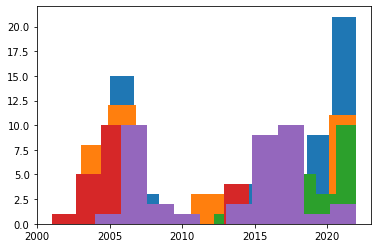

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist( dx['film']);
plt.hist( dx['books']);
plt.hist( dx['tv-and-radio']);
plt.hist( dx['society']);
plt.hist( dx['stage']);


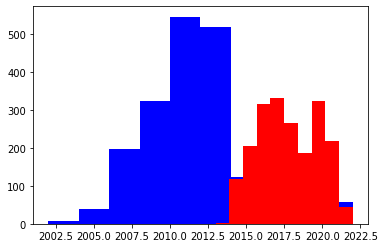

In [21]:

plt.hist( dx['world'],color='b');
plt.hist( dx['us-news'],color='r');



In [19]:
len(dx['us-news']), len(dx['world'])

(2009, 1939)

In [22]:
src = urls[2]
fn = '_'.join(src.split('/')[-1].split('-')[2:-1])
fn

'joe_biden_affordable_care_act'

In [8]:
titles, sections, urls = zip(*data)

In [10]:
' '.join(list(set(sections)))

'housing-network tv-and-radio media theobserver technology music world sport inequality social-care-network business uk-news lifeandstyle commentisfree fashion childrens-books-site global-development-professionals-network voluntary-sector-network culture-professionals-network stage artanddesign culture society teacher-network australia-news law global-development film travel membership news education football books us-news global science cities sustainable-business careers theguardian games uk politics'

In [16]:
target = [x for x in data if x[1] in ['fashion']]
len(target)
tt, ss, uu = zip(*target)
import pandas as pd

pd.DataFrame({'title': tt, 'sextion': ss})

,title,sextion
0,Ask Hadley Has Victoria’s Secret’s offensive ...,fashion
1,The look I love Caitlyn Jenner: ‘It was tough...,fashion
2,Marketing boss quits Victoria's Secret after f...,fashion
3,The look I love Munroe Bergdorf: ‘At the begi...,fashion
4,The Fashion spring/summer 2019 Munroe Bergdor...,fashion
5,'Every step I take is a defiance': Rain Dove o...,fashion
6,Ask Hadley Tantrums over tiaras … how to navi...,fashion
7,Hari Nef: ‘Identity is a dead end. It’s a snoo...,fashion
8,How I get ready Boy Meets Girl’s Rebecca Root...,fashion
9,"Transparent: finally, a realistic portrayal of...",fashion


In [21]:
#this is so that it works nicely on a restart    
prefix, start  = 'pd', 0
fns = [ int(x[len(prefix):]) for x in os.listdir('.') if x[:len(prefix)] ==  prefix ]
if fns : start = max(fns) + 1
    
print(start)
miner(uu, start=start, prefix=prefix)
    

0


In [65]:

pc = re.compile('href="(.*?)"', re.DOTALL)

ims = [ x for x in pc.findall(r.text) if "comics" in x]
pics = [ x for x in re.split('[=\+&]+',ims[0]) if 'jpg' in x]

for k, url in enumerate(pics):
    print('Getting', k)
    with open(fn + '_{:02}.jpg'.format(k),'wb') as fp:
        fp.write(requests.get(url).content)


Getting 0
Getting 1
Getting 2
Getting 3
Getting 4
Getting 5
Getting 6
Getting 7
Getting 8
Getting 9
Getting 10
Getting 11
Getting 12


In [64]:
"{:02}".format(5)

'05'

In [5]:
from collections import Counter

In [19]:
data[0][1]

'tv-and-radio'

In [21]:
xx = Counter([x[1] for x in data])
tags = Counter([x[1] for x in data])

In [22]:
[ (tag, total) for tag, total in xx.items() if total >5]
print('\n'.join([ x for x in sorted(tags.keys())]) )

artanddesign
books
cities
commentisfree
education
environment
fashion
global
lifeandstyle
media
money
music
politics
society
technology
theguardian
travel
tv-and-radio
uk-news
world


In [13]:
bag = [x  for x in data if ' '.join(x[0].split()[:2]).lower() == 'we must']
bag = [x  for x in data if ' '.join(x[0].split()[:2]).lower() != 'podcast the']
bag =  [ x for x in data if 'transphob' in x[0].lower() ]
titles, urls = zip(*bag)
with open('urls.txt','w') as fp:
    fp.write('\n'.join(urls))
    


In [23]:
tags

Counter({'tv-and-radio': 6,
         'commentisfree': 372,
         'lifeandstyle': 27,
         'books': 16,
         'society': 5,
         'world': 5,
         'artanddesign': 3,
         'environment': 1,
         'uk-news': 1,
         'money': 3,
         'music': 1,
         'media': 3,
         'politics': 3,
         'education': 2,
         'cities': 1,
         'global': 4,
         'travel': 22,
         'theguardian': 15,
         'technology': 1,
         'fashion': 2})

In [58]:
titles[:]

("We must all share the blame for our 'useless' politicians",
 "We must brave the rage, and take on won't-pay fathers",
 'We must hold our nerve and support deprived children',
 'We must be free to criticise without being called racist',
 'We must save the dome for sport and rock concerts',
 'We must save the BBC: it is too precious to switch off')

In [20]:
from goose3 import Goose
import time, os

def miner(urls, 
          start=0, 
          prefix=''):
    
    #with open('urls.txt','r') as fp:
    #    urls = list(fp.readlines())

    gg = Goose()
    failed = []
    for k, url in enumerate(urls[start:]):
        
        url = url.strip()
        ss = str(k + start)
        fn = prefix + '0'*(4 - len(ss)) + ss
        try:
            art = gg.extract( url=url)
            with open(fn,'w') as fp:    
                fp.write('\n\n'.join([art.title, art.meta_keywords, art.cleaned_text, url]))
        except:
            failed.append( url)
        time.sleep(5)

    with open('failed.txt','w') as ffp:
        ffp.write('\n'.join(failed))

#this is so that it works nicely on a restart    
prefix, start  = 'hh', 0
fns = [ int(x[len(prefix):]) for x in os.listdir('.') if x[:len(prefix)] ==  prefix ]
if fns : start = max(fns) + 1
    
print(start)
#miner(start=start, prefix=prefix)
    
    
        

0


In [37]:
k = 3000
ss = str(k)
fn = '0'*(4 - len(ss)) + ss
fn

'3000'

In [ ]:
len(urls)


In [ ]:
! more hh0000

Transphobia row leaves Scottish poetry scene in turmoil

Books,Culture,Scotland,Poetry,Transgender,UK news,PEN

A bitter conflict is escalating in the Scottish literary scene with the Scottish
 Poetry Library (SPL) standing accused of “institutional transphobia” after it s
aid that it would not support “bullying and calls for no-platforming of writers”
.

The organisation – an influential part of Scotland’s thriving poetry scene – rel
eased its statement in February after what it described as an “escalation, parti
cularly on social media, of disharmony” and an increase in writers being no-plat
formed at literary events. It stressed that the statement was to encourage freed
om of expression and was not tied to a specific incident, but, speaking to the N
ational, SPL director Asif Khan said that these issues had affected the mental h
ealth of some unnamed poets, claiming some had become suicidal.

The issue was raised in the Scottish parliament on Tuesday, where the SNP’s Joan
 McAlpine 